In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
from datetime import datetime
%matplotlib inline

In [2]:
# we have 3 files here 
converter={
    "population":lambda x:np.int32(x.replace(",",""))
}
locations=pd.read_csv(os.path.join("Motor+Vehicle+Thefts","locations.csv"),
             converters=converter        )
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location_id  16 non-null     int64  
 1   region       16 non-null     object 
 2   country      16 non-null     object 
 3   population   16 non-null     int32  
 4   density      16 non-null     float64
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 704.0+ bytes


In [3]:
locations.head()

,location_id,region,country,population,density
0,101,Northland,New Zealand,201500,16.11
1,102,Auckland,New Zealand,1695200,343.09
2,103,Waikato,New Zealand,513800,21.50
3,104,Bay of Plenty,New Zealand,347700,28.80
4,105,Gisborne,New Zealand,52100,6.21


In [4]:
make_details=pd.read_csv(os.path.join("Motor+Vehicle+Thefts","make_details.csv"))
make_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   make_id    138 non-null    int64 
 1   make_name  138 non-null    object
 2   make_type  138 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.4+ KB


In [5]:
make_details.head()

,make_id,make_name,make_type
0,501,Aakron Xpress,Standard
1,502,ADLY,Standard
2,503,Alpha,Standard
3,504,Anglo,Standard
4,505,Aprilia,Standard


In [6]:
converters={
    "model_year":lambda x:datetime.strptime(x,"%Y") if x else None,
    "date_stolen":lambda x:datetime.strptime(x,"%m/%d/%y") if x else None
}
stolen_vehicles=pd.read_csv(os.path.join("Motor+Vehicle+Thefts","stolen_vehicles.csv"),
                  
                   converters=converters        )
stolen_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553 entries, 0 to 4552
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   vehicle_id    4553 non-null   int64         
 1   vehicle_type  4527 non-null   object        
 2   make_id       4538 non-null   float64       
 3   model_year    4538 non-null   datetime64[ns]
 4   vehicle_desc  4520 non-null   object        
 5   color         4538 non-null   object        
 6   date_stolen   4553 non-null   datetime64[ns]
 7   location_id   4553 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 284.7+ KB


In [7]:
stolen_vehicles.head()

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
0,1,Trailer,623.0,2021-01-01,BST2021D,Silver,2021-11-05,102
1,2,Boat Trailer,623.0,2021-01-01,OUTBACK BOATS FT470,Silver,2021-12-13,105
2,3,Boat Trailer,623.0,2021-01-01,ASD JETSKI,Silver,2022-02-13,102
3,4,Trailer,623.0,2021-01-01,MSC 7X4,Silver,2021-11-13,106
4,5,Trailer,623.0,2018-01-01,D-MAX 8X5,Silver,2022-01-10,102


In [8]:
stolen_vehicles=pd.merge(stolen_vehicles,locations).drop("location_id",axis=1)\
.drop("country",axis=1)

In [9]:
stolen_vehicles=pd.merge(stolen_vehicles,make_details).drop("make_id",axis=1)

In [10]:
stolen_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4538 entries, 0 to 4537
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   vehicle_id    4538 non-null   int64         
 1   vehicle_type  4527 non-null   object        
 2   model_year    4538 non-null   datetime64[ns]
 3   vehicle_desc  4520 non-null   object        
 4   color         4538 non-null   object        
 5   date_stolen   4538 non-null   datetime64[ns]
 6   region        4538 non-null   object        
 7   population    4538 non-null   int32         
 8   density       4538 non-null   float64       
 9   make_name     4538 non-null   object        
 10  make_type     4538 non-null   object        
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(6)
memory usage: 372.4+ KB


In [11]:
stolen_vehicles["vehicle_type"].fillna("un known type",inplace=True)

In [12]:
stolen_vehicles["vehicle_desc"].fillna("un known descreption")

0          BST2021D
1        ASD JETSKI
2         D-MAX 8X5
3           BSTB85B
4         CT DIG 25
           ...     
4533          VEGAS
4534      ELITE 8X4
4535        TRAILER
4536      COMMANDER
4537    RANGE ROVER
Name: vehicle_desc, Length: 4538, dtype: object

In [13]:
len(stolen_vehicles[stolen_vehicles["model_year"] > stolen_vehicles["date_stolen"]])==0

True

In [14]:
regions_thefts=stolen_vehicles["region"].value_counts().sort_index()
regions_population=pd.Series\
([locations.loc[locations["region"]==x,"population"].values[0] for x in regions_thefts.index])
regions_population.index=regions_thefts.index
data={"population":regions_population,
              "thefts":regions_thefts,
              "thefts_density":regions_thefts/regions_population.values}
regions_data=pd.DataFrame(data,index=regions_thefts.index)
regions_data

,population,thefts,thefts_density
region,,,
Auckland,1695200,1630,0.000962
Bay of Plenty,347700,445,0.001280
Canterbury,655000,660,0.001008
Gisborne,52100,175,0.003359
Hawke's Bay,182700,100,0.000547
Manawatū-Whanganui,258200,139,0.000538
Nelson,54500,92,0.001688
Northland,201500,234,0.001161
Otago,246000,139,0.000565


Text(0.5, 1.0, 'thefts density related to population of each region')

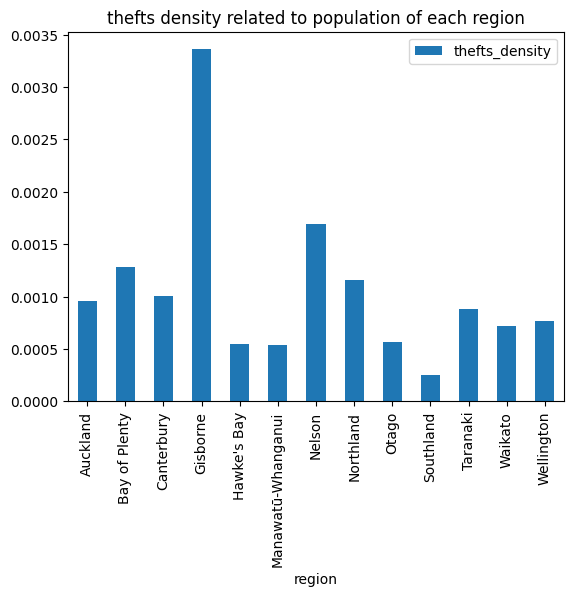

In [15]:
regions_data.plot(y="thefts_density",kind="bar")
plt.title("thefts density related to population of each region")

Text(0.5, 1.0, 'model years of stolen cars')

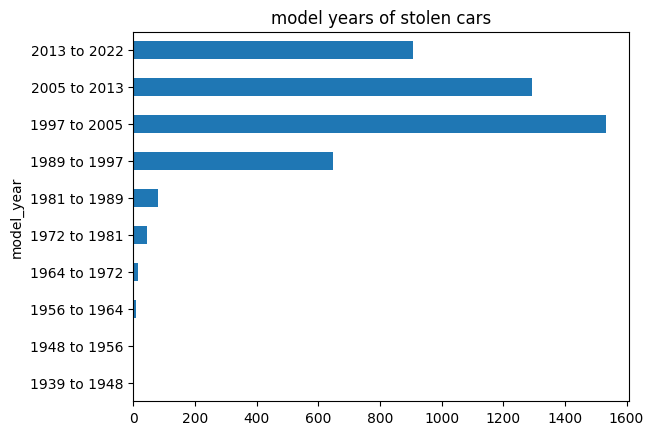

In [16]:
model_years=pd.cut(stolen_vehicles["model_year"].dt.year,10)
stolen_vehicles.groupby(model_years)["vehicle_id"].count().sort_index()\
.plot(kind="barh")
plt.yticks(np.arange(len(model_years.values.categories)),\
        [f"{int(x.left)} to {int(x.right)}" for x in model_years.values.categories]
          )
plt.title("model years of stolen cars")

Text(0.5, 1.0, 'top 10 cars colors')

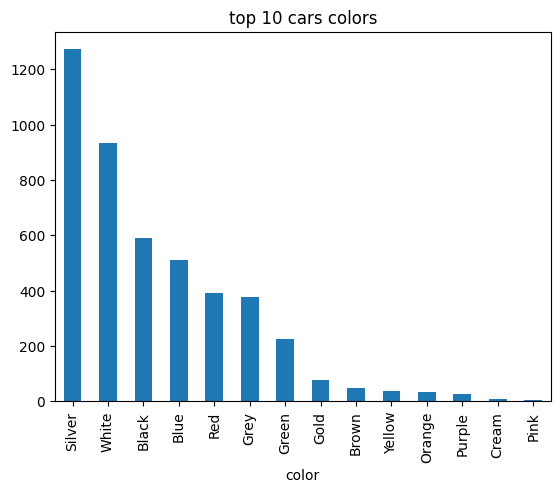

In [26]:
stolen_vehicles["color"].value_counts().plot(kind="bar")
plt.title("top 10 cars colors")

Text(0.5, 1.0, 'top 10 vehicle types')

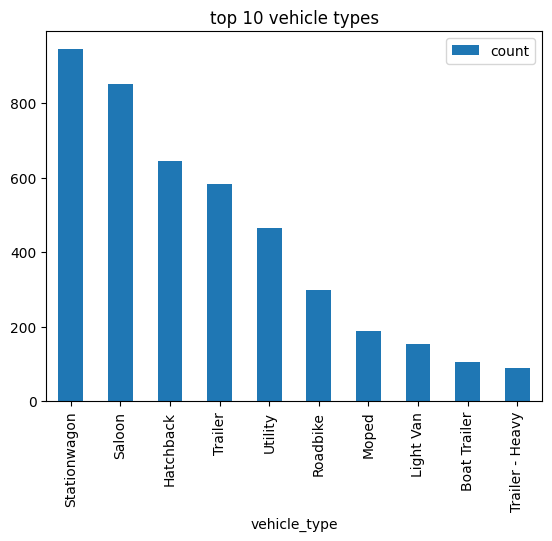

In [25]:
stolen_vehicles["vehicle_type"].value_counts()[:10].to_frame().plot(kind="bar")
plt.title("top 10 vehicle types")

Text(0.5, 1.0, 'the relation between thefts and population')

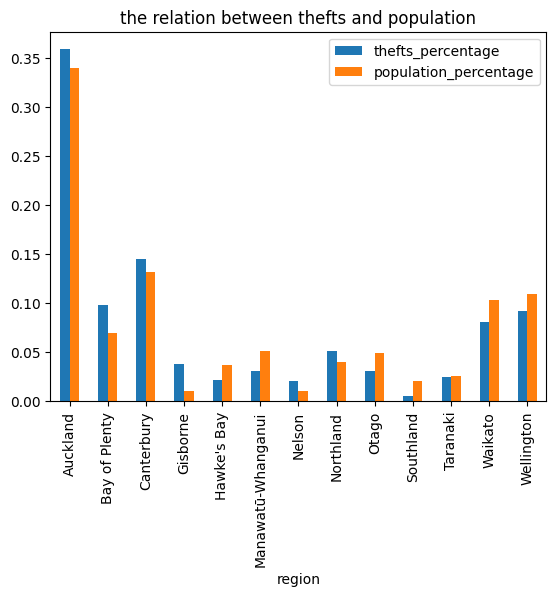

In [19]:
regions_data["thefts_percentage"]=stolen_vehicles["region"].value_counts(normalize=True).sort_index()
regions_data["population_percentage"]=regions_data["population"]/regions_data["population"].sum()
regions_data.plot(kind="bar",y=["thefts_percentage","population_percentage"])
plt.title("the relation between thefts and population")



In [21]:
regions_data["region_density"]=[locations.loc[locations["region"]==region,"density"].values[0]\
for region in regions_data.index]
regions_data

,population,thefts,thefts_density,thefts_percentage,population_percentage,region_density
region,,,,,,
Auckland,1695200,1630,0.000962,0.359189,0.340408,343.09
Bay of Plenty,347700,445,0.001280,0.098061,0.069821,28.80
Canterbury,655000,660,0.001008,0.145439,0.131529,14.72
Gisborne,52100,175,0.003359,0.038563,0.010462,6.21
Hawke's Bay,182700,100,0.000547,0.022036,0.036687,12.92
Manawatū-Whanganui,258200,139,0.000538,0.030630,0.051848,11.62
Nelson,54500,92,0.001688,0.020273,0.010944,129.15
Northland,201500,234,0.001161,0.051565,0.040463,16.11
Otago,246000,139,0.000565,0.030630,0.049399,7.89


Text(0.5, 1.0, 'top 10 makers')

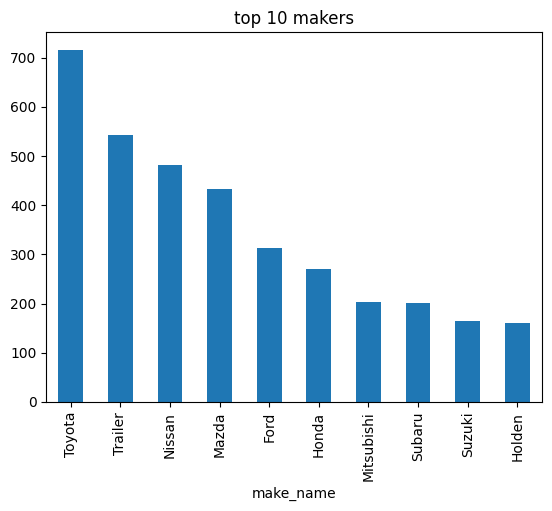

In [27]:
stolen_vehicles["make_name"].value_counts()[:10].plot(kind="bar")
plt.title("top 10 makers")

Text(0.5, 1.0, 'top 10 made years of stolen cars')

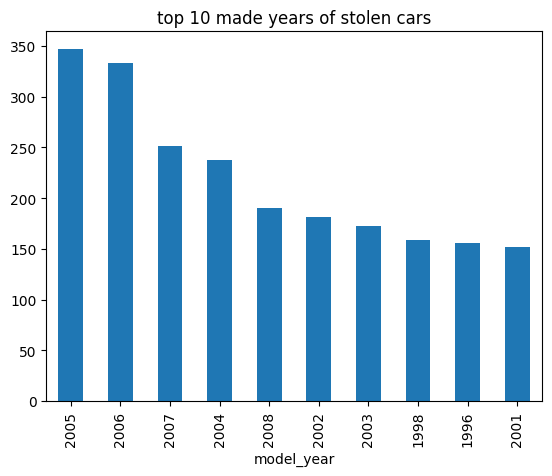

In [30]:
stolen_vehicles["model_year"].dt.year.value_counts()[:10].plot(kind="bar")
plt.title("top 10 made years of stolen cars")

model_year
1    4538
Name: count, dtype: int64